<a href="https://colab.research.google.com/github/mdnpCs487/hello-world/blob/master/Copy_of_Pert3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train=x_train/255.0
x_test = x_test/255.0



11493376/11490434 [==============================] - 2s 0us/step


In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train = np.reshape(x_train,
                     (x_train.shape[0], 784))
x_test = np.reshape(x_test,
                    (x_test.shape[0], 784))

In [0]:
x_train.shape

(60000, 784)

In [0]:
inputs = Input(shape=(784,))

h_encode = Dense(512, activation = 'relu') (inputs)
h_encode = Dense(256, activation='relu')(h_encode)
h_encode = Dense(128,activation = 'relu')(h_encode)
h_encode = Dense(64,activation='relu')(h_encode)

coded = Dense(32, activation='relu')(h_encode)

h_decode = Dense(64, activation='relu')(coded)
h_decode = Dense(128, activation = 'relu')(h_decode)
h_decode= Dense(256, activation='relu')(h_decode)
h_decode = Dense(512, activation = 'relu')(h_decode)

outputs = Dense(784, activation='sigmoid')(h_decode)

autoencoder = Model(inputs, outputs)

In [0]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(x_train,x_train,
                epochs=10,
                batch_size=100,
                shuffle=True,
                validation_data=(x_test,x_test))





Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 20s 339us/step - loss: 0.0434 - val_loss: 0.0254
Epoch 2/10
60000/60000 [==============================] - 19s 322us/step - loss: 0.0215 - val_loss: 0.0179
Epoch 3/10
60000/60000 [==============================] - 19s 322us/step - loss: 0.0168 - val_loss: 0.0154
Epoch 4/10
60000/60000 [==============================] - 19s 323us/step - loss: 0.0146 - val_loss: 0.0135
Epoch 5/10
60000/60000 [==============================] - 19s 324us/step - loss: 0.0132 - val_loss: 0.0124
Epoch 6/10
60000/60000 [==============================] - 20s 325us/step - loss: 0.0122 - val_loss: 0.0122
Epoch 7/10
60000/60000 [==============================] - 20s 326us/step - loss: 0.0114 - val_loss: 0.0111
Epoch 8/10
60000/60000 [==============================] - 19s 325us/step - loss: 0.0107 - val_loss: 0.0105
Epoch 9/10
60000/60000 [==============================] - 20s 326us/step - loss: 0.01

In [0]:
predicted = autoencoder.predict(x_test)

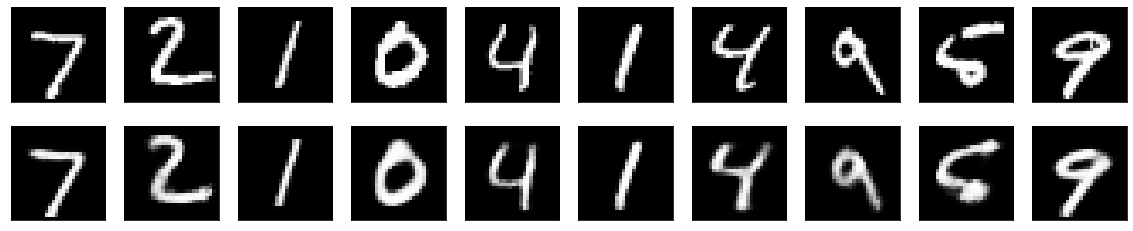

In [0]:
n=10
plt.figure(figsize=(20,4))

for i in range(n):
  ax=plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax=plt.subplot(2, n, i + 1 + n)
  plt.imshow(predicted[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()